In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_json("Sarcasm_Headlines_Dataset.json", lines = True)

In [ ]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [ ]:
data = data.drop('article_link',axis=1)

In [ ]:
data

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [ ]:

data.isna().sum()


headline        0
is_sarcastic    0
dtype: int64

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

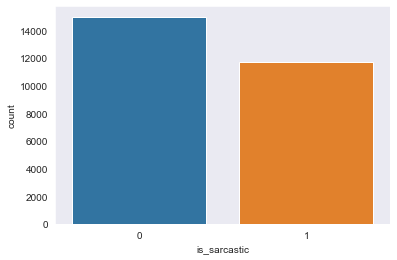

In [ ]:
sns.set_style("dark")
sns.countplot(data.is_sarcastic)

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
data['headline']=data['headline'].apply(denoise_text)

## WORDCLOUD FOR TEXT THAT IS NOT SARCASTIC (LABEL - 0)

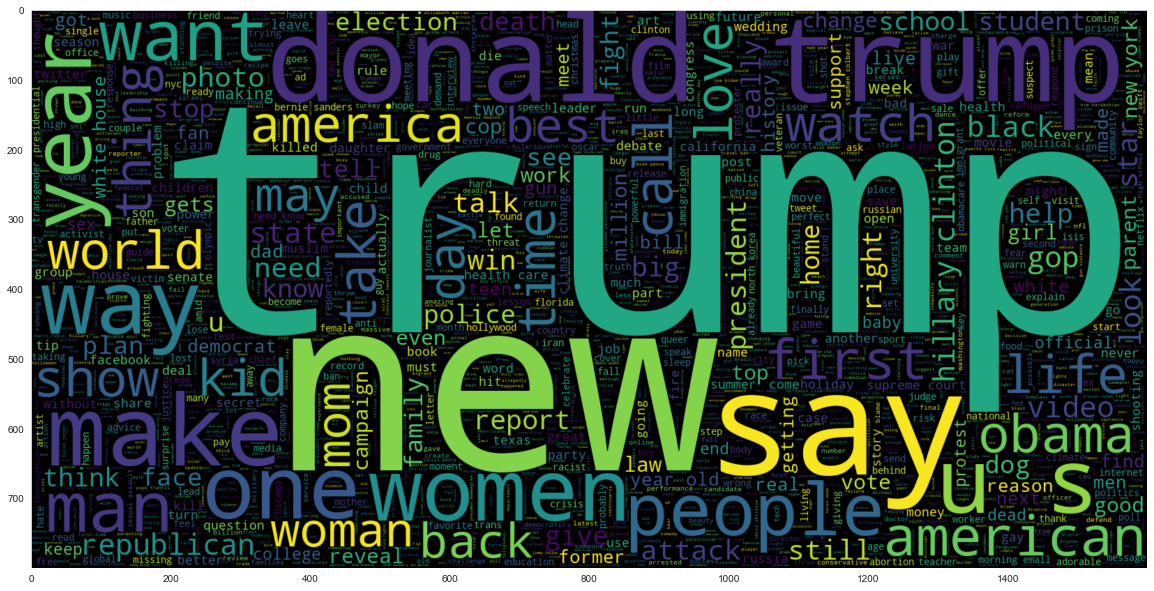

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

## WORDCLOUD FOR TEXT THAT IS SARCASTIC (LABEL - 1)

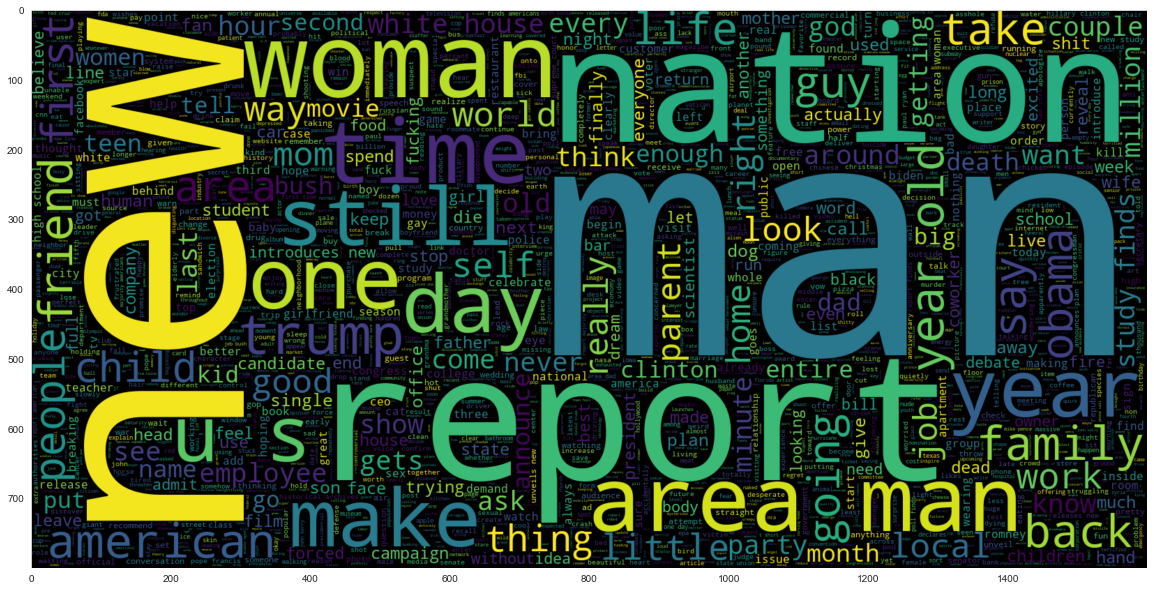

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

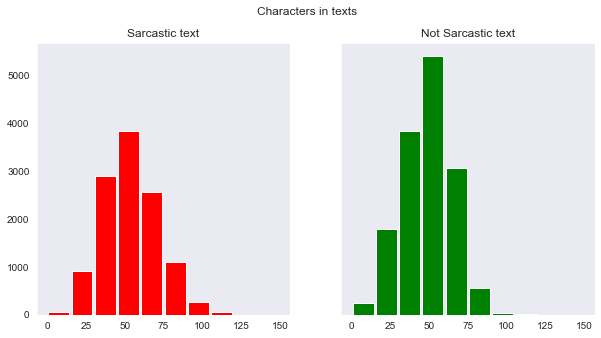

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),sharey=True)
text_len=data[data['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len,color='red',range=(0,150),rwidth=0.9)
ax1.set_title('Sarcastic text')
text_len=data[data['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len,color='green',range=(0,150),rwidth=0.9)
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()

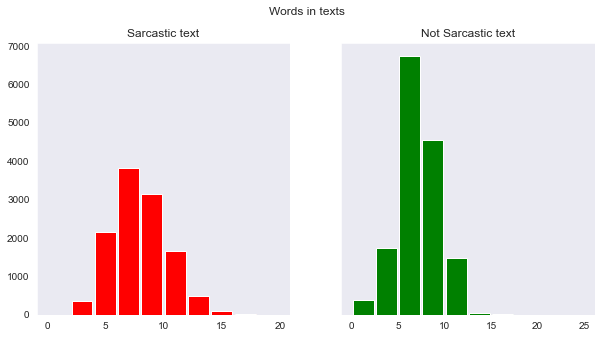

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),sharey=True)
text_len=data[data['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red',range=(0,20),rwidth=0.9)
ax1.set_title('Sarcastic text')
text_len=data[data['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green',range=(0,25),rwidth=0.9)
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

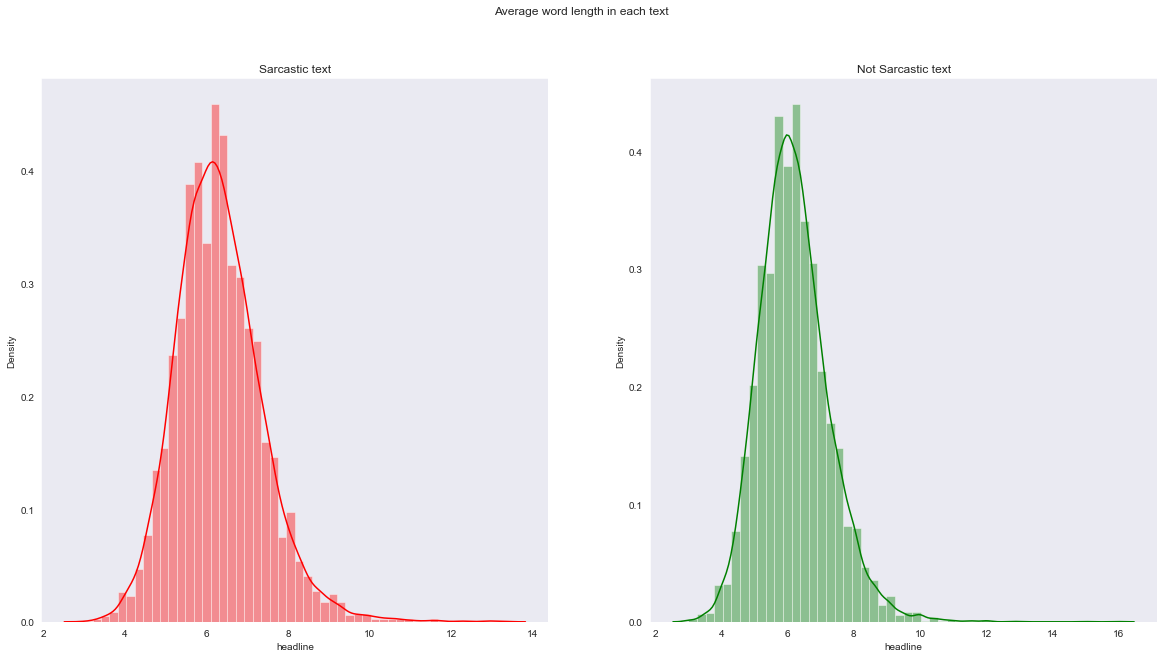

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=data[data['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Sarcastic text')
word=data[data['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

In [ ]:
words = []
for i in data.headline.values:
    words.append(i.split())
words[:5]

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  "'black",
  "code'",
  'minority',
  'shoppers'],
 ["'roseanne'",
  'revival',
  'catches',
  'thorny',
  'political',
  'mood,',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  "son's",
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen,',
  'come',
  'alternative',
  'debt-reduction',
  'ideas'],
 ['j.k.', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way']]

In [ ]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 200

#Creating Word Vectors by Word2Vec Method
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [ ]:
#vocab size
len(w2v_model.wv.vocab)
#We have now represented each of 35071 words by a 100dim vector.

36436

In [ ]:
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [ ]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceases by 1
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

<ipython-input-21-d9da2bd6ecb8>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  weight_matrix[i] = model[word]


In [ ]:
embedding_vectors

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.61330298e-02, -9.27689731e-01,  5.91125548e-01, ...,
         1.07475448e+00,  5.96502200e-02,  1.26334965e+00],
       [ 3.62886786e-02, -7.78630733e-01,  4.79645371e-01, ...,
         9.12216306e-01,  7.71167874e-02,  1.07788599e+00],
       ...,
       [-1.36202003e-03, -1.80933101e-03,  1.34263290e-04, ...,
         1.69961608e-03, -7.85599055e-04, -1.04949623e-03],
       [ 2.21348274e-03,  1.26265327e-03,  2.54053739e-03, ...,
         2.71118013e-03,  1.42578804e-03,  1.82672217e-03],
       [-1.60430372e-03, -2.05181376e-03,  2.34340644e-03, ...,
        -9.30275070e-04, -1.83307694e-03,  1.31705066e-03]])

In [ ]:

#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

C:\Users\sumit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 200)           7287400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 20, 256)          336896    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               55680     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,680,041
Trainable params: 7,680,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, data.is_sarcastic , test_size = 0.3 , random_state = 0)

In [ ]:
kf=KFold(10)
fold=0
y=data.is_sarcastic
for train, test in kf.split(x,y):
    fold+=1
x_train=x[train]
y_train=y[train]
x_test=x[test]
y_test=y[test]


In [ ]:
history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
188/188 [==============================] - 64s 341ms/step - loss: 0.2250 - acc: 0.9202 - val_loss: 0.2572 - val_acc: 0.8985
Epoch 2/3
188/188 [==============================] - 68s 360ms/step - loss: 0.0997 - acc: 0.9653 - val_loss: 0.2904 - val_acc: 0.8895
Epoch 3/3
188/188 [==============================] - 67s 359ms/step - loss: 0.0583 - acc: 0.9799 - val_loss: 0.3636 - val_acc: 0.8873


In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

752/752 [==============================] - 10s 14ms/step - loss: 0.0288 - acc: 0.9907
Accuracy of the model on Training Data is -  99.06818270683289
84/84 [==============================] - 1s 16ms/step - loss: 0.3636 - acc: 0.8873
Accuracy of the model on Testing Data is -  88.72659206390381


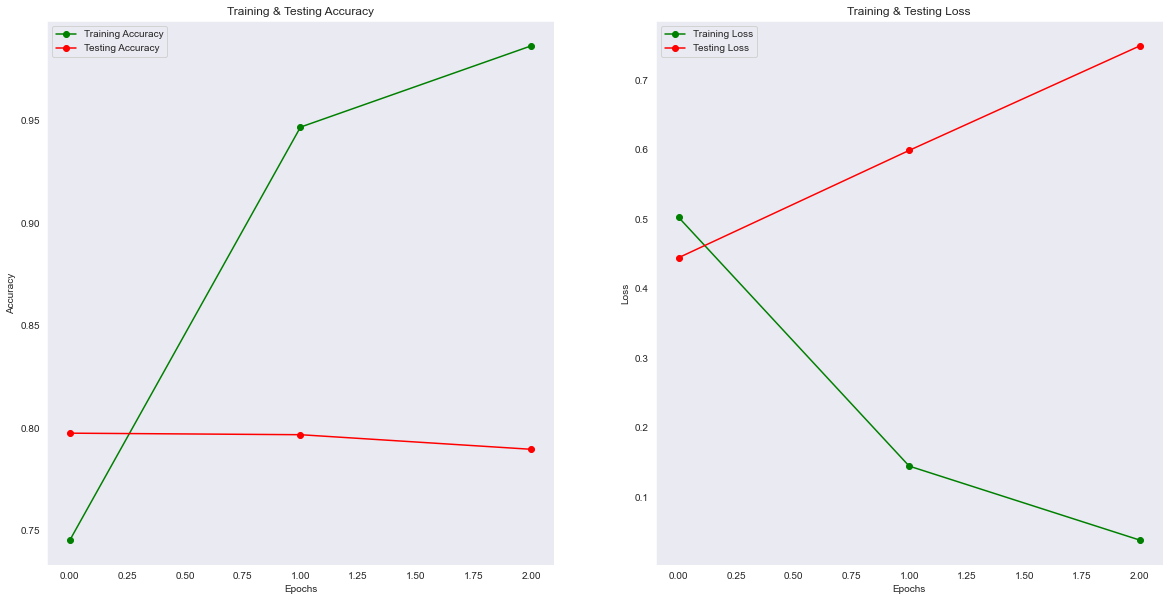

In [ ]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict(x_test)
pred[:5]

array([[0.9631714 ],
       [0.9884064 ],
       [0.86677194],
       [0.00591958],
       [0.95880985]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_test,rounded)
cm

array([[3906,  577],
       [1108, 2422]], dtype=int64)

In [ ]:
y_test

10646    0
1971     1
19747    1
14554    0
19329    1
        ..
1805     0
2269     0
23061    1
23998    0
20830    0
Name: is_sarcastic, Length: 8013, dtype: int64

In [ ]:
rounded = [np.round(x) for x in pred]

<AxesSubplot:>

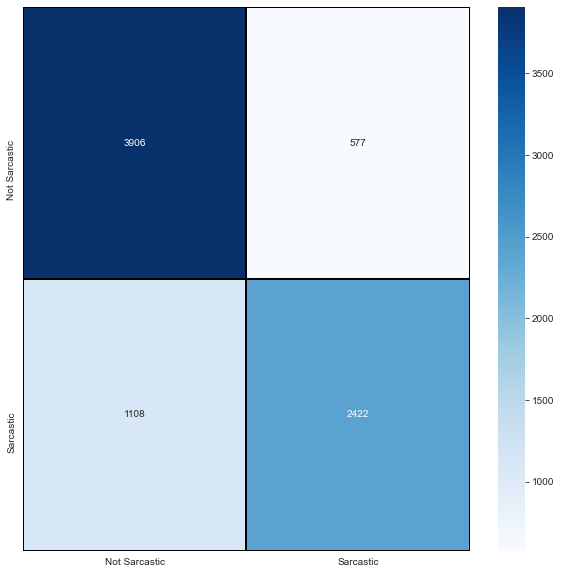

In [ ]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [ ]:
# Replacing special symbols and digits in headline column
# re stands for Regular Expression
data['headline'] = data['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))

In [ ]:
# getting features and labels
features = data['headline']
labels = data['is_sarcastic']

In [ ]:
# Stemming our data
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [ ]:
#Lemmatizing our data
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

# single word lemmatization examples
#list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling',
 #        'driving', 'died', 'tried', 'feet']
#for words in list1:
   # print(words + " ---> " + wnl.lemmatize(words))
#df['x_3'] = df['x'].apply(lambda x : x * 3)
#print(df)
features= features.apply(lambda x: x.split())
features= features.apply(lambda x : ' '.join([wnl.lemmatize(word) for word in x]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
features.head()

0    former versace store clerk sue secret black co...
1    roseanne revival catch thorny political mood b...
2    mom starting fear son s web series closest thi...
3    boehner want wife listen come alternative debt...
4    j k rowling wish snape happy birthday magical way
Name: headline, dtype: object

In [ ]:
# vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [ ]:
len(features)

26709

In [ ]:
# getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .05, random_state = 0)

In [ ]:
labels_train

14285    1
2201     1
3543     1
11153    0
25843    0
        ..
13123    0
19648    0
9845     1
10799    0
2732     0
Name: is_sarcastic, Length: 25373, dtype: int64

In [ ]:
#10 fold cross validation
kf=KFold(n_splits=10)

In [ ]:
# model 1:-
# Using linear support vector classifier
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
score=cross_val_score(lsvc,features,labels,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
# getting the score of train and test data
print(lsvc.score(features_train, labels_train))
print(lsvc.score(features_test, labels_test))
# model 2:-
# Using Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
score1=cross_val_score(gnb,features,labels,cv=kf)
print("Cross Validation Scores are {}".format(score1))
print("Average Cross Validation score :{}".format(score1.mean()))
print(gnb.score(features_train, labels_train))
print(gnb.score(features_test, labels_test))
# model 3:-
# Logistic Regression
lr = LogisticRegression()
lr.fit(features_train, labels_train)
score2=cross_val_score(lr,features,labels,cv=kf)
print("Cross Validation Scores are {}".format(score2))
print("Average Cross Validation score :{}".format(score2.mean()))
print(lr.score(features_train, labels_train))
print(lr.score(features_test, labels_test))
# model 4:-
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
score3=cross_val_score(rfc,features,labels,cv=kf)
print("Cross Validation Scores are {}".format(score3))
print("Average Cross Validation score :{}".format(score3.mean()))
print(rfc.score(features_train, labels_train))
print(rfc.score(features_test, labels_test))

Cross Validation Scores are [0.78360165 0.79707975 0.78472482 0.78509921 0.78210408 0.80119805
 0.78472482 0.77873456 0.78734556 0.782397  ]
Average Cross Validation score :0.7867009508425213
0.8782170023253064
0.7971556886227545
Cross Validation Scores are [0.7188319  0.71396481 0.71733433 0.70572819 0.69299888 0.70797454
 0.70872332 0.69824036 0.72819169 0.70149813]
Average Cross Validation score :0.7093486146809188
0.7836676782406495
0.7432634730538922
Cross Validation Scores are [0.78771996 0.79707975 0.7899663  0.78846874 0.7903407  0.80007488
 0.78547361 0.78023212 0.794459   0.78951311]
Average Cross Validation score :0.79033281591571
0.8485397863871044
0.7971556886227545
Cross Validation Scores are [0.74354174 0.74241857 0.7543991  0.7364283  0.76226133 0.74578809
 0.740921   0.75365032 0.73904905 0.74831461]
Average Cross Validation score :0.7466772113293427
0.9826587317226974
0.7544910179640718


In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(l_r = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors